## 1.Подготовка 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as sk_preprocessing
import sklearn.linear_model as sk_linear_models
import sklearn.metrics as sk_metrics
import sklearn.model_selection as sk_model_selection
import numpy as np
import seaborn as sns




Для универсальности выполнения задачи создадим функцию . 

Аргументы функции : X-независимая переменная ,y-зависимая переменная ,Max_degree-максимальная степень до которой  функция будет считать MSE, k-количество случайных разделения данных и обучений  на train и test  

In [2]:
def Search_Optimal_degree(X, y,Max_degree,k):
    MSE=[]
    for degree in range(1,Max_degree+1):
        result=[]
        l_test=[]
        l_train=[]
        for n in range(k):
            
            X_train, X_test, y_train, y_test = sk_model_selection.train_test_split(X, y, shuffle = True) #случайное разделения данных на train и test 
            polynomial_transformer = sk_preprocessing.PolynomialFeatures(degree=degree) #добавления полинома
            X_transformed_train = polynomial_transformer.fit_transform(X_train)
            model = sk_linear_models.LinearRegression()
            model.fit(X_transformed_train , y_train) #обучения линейной регрессии 
            y_train_predicted = model.predict(X_transformed_train)
            X_transformed_test=polynomial_transformer.fit_transform(X_test)
            y_test_predicted = model.predict( X_transformed_test)
            
            l_test.append(sk_metrics.mean_squared_error(y_test, y_test_predicted))
            l_train.append(sk_metrics.mean_squared_error(y_train, y_train_predicted))
        
        result.append(np.mean(l_test) )# записываем среднее MSE test случайных разделения данных и обучений
        result.append(np.mean(l_train) )# записываем среднее MSE train случайных разделения данных и обучений
        result.append(degree)
#         result.append(y_train_predicted)
#         result.append(y_test_predict)
        
        MSE.append(result)
    columns=[ 'MSE_test','MSE_train','degree']
    df_result = pd.DataFrame(MSE, columns=columns)
    return df_result
    


## 2. Работа с данными 

2.1 Возмем ранее изученые данные и проверим на  наличии связи с полиноминальном регрессией

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/programmer1sss/ML/main/Data/advertising.csv")
X = df[["radio"]]
y = df[["sales"]]




2.2 Немного визуализации 

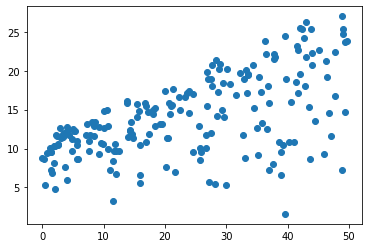

In [4]:
plt.scatter(X, y)

2.3 Построения модели и вывод данных 

In [5]:

k=10 # количество  обучений модели с случайным разделения по каждой степени 
Max_degree=20 #b максимальная степень проверки данных
df_Search =Search_Optimal_degree(X, y,Max_degree,k)
print(df_Search)

     MSE_test  MSE_train  degree
0   17.126657  18.445515       1
1   18.483939  18.082406       2
2   20.033953  17.535094       3
3   18.731149  18.024633       4
4   21.329888  17.300539       5
5   19.737378  17.699675       6
6   17.456869  18.245679       7
7   19.533767  17.587306       8
8   24.514052  16.136732       9
9   19.750370  17.574823      10
10  22.547127  16.462538      11
11  19.680307  17.259005      12
12  21.041154  17.333683      13
13  24.218636  16.453556      14
14  21.611262  17.164541      15
15  24.081141  16.706533      16
16  21.700179  17.109682      17
17  22.873505  16.823525      18
18  18.085523  18.053792      19
19  19.677418  17.629560      20


In [6]:

df_Search.iloc[df_Search['MSE_train'].argmin()] # Находим минимальный MSE_train и возврашаем MSE_train и степень

MSE_test     24.514052
MSE_train    16.136732
degree        9.000000
Name: 8, dtype: float64

2.4 Вывод : на MSE_train выделяется небольшая зависимость от степени  и минимальная ошибика на степени  "12"

## 3 Визуализация модели с полученной степнью 

<function matplotlib.pyplot.show(close=None, block=None)>

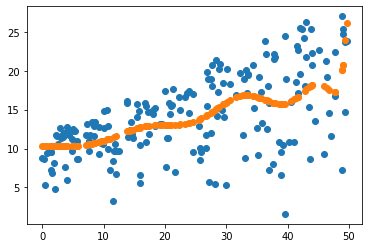

In [7]:
X_train, X_test, y_train, y_test = sk_model_selection.train_test_split(X, y, shuffle = True) #случайное разделения данных на train и test 
polynomial_transformer = sk_preprocessing.PolynomialFeatures(degree=12) #добавления полинома
X_transformed_train = polynomial_transformer.fit_transform(X_train)
model = sk_linear_models.LinearRegression()
model.fit(X_transformed_train , y_train) #обучения линейной регрессии 
y_train_predicted = model.predict(X_transformed_train)
X_transformed_test=polynomial_transformer.fit_transform(X_test)
y_test_predict = model.predict( X_transformed_test)
plt.scatter(X, y)
plt.scatter(X_train, y_train_predicted)
plt.show